In [1]:
import pandas as pd
import numpy as np
import nltk
import itertools
import pathlib
from tqdm import tqdm
import time
from matplotlib import pyplot as plt
from random import randint
import cv2

In [2]:
cd /Users/sayako/ocha/study/localized-narratives-master

/Users/sayako/ocha/study/localized-narratives-master


In [3]:
ls

210705.ipynb
210724_名詞.ipynb
CONTRIBUTING.md*
LICENSE*
OpenImage/
README.md*
ade20k_train_localized_narratives.jsonl
all_data_image/
all_data_image.ipynb
bleu.ipynb
coco_train_localized_narratives-00000-of-00004.jsonl
coco_train_localized_narratives-00001-of-00004.jsonl
coco_train_localized_narratives-00002-of-00004.jsonl
coco_train_localized_narratives-00003-of-00004.jsonl
coco_val_localized_narratives.jsonl
color.jpg
data_jsonl.ipynb
demo.py*
images/
index.html*
localized_narratives.py*
open_images_train_v6_localized_narratives-00000-of-00010.jsonl
result/
transcription_example.py*
val2017/
web.js*


In [4]:
#データ読み込み
df = pd.read_json('coco_val_localized_narratives.jsonl', orient='records', lines=True)

In [5]:
#index確認
print(np.array(df.columns))  

['dataset_id' 'image_id' 'annotator_id' 'caption' 'timed_caption' 'traces'
 'voice_recording']


In [6]:
#print(df[df['image_id'] == 391895])
#391895

In [7]:
#print(df[df['dataset_id']=="mscoco_val2017"])

In [8]:
id_ = 204

In [9]:
#データ選択
data_1 = df[id_:id_+1].values.tolist()

In [10]:
#データ確認
data_1[0]

['mscoco_val2017',
 34139,
 25,
 'I can see in this image a bag of a brown color. I can also see two man among them a woman and a man is standing on the ground. The woman is holding a bag in her hand. In the background I can see a building and a statue.',
 [{'utterance': 'I', 'start_time': 0.0, 'end_time': 0.6000000000000001},
  {'utterance': 'can', 'start_time': 0.6000000000000001, 'end_time': 0.9},
  {'utterance': 'see', 'start_time': 0.9, 'end_time': 1.1},
  {'utterance': 'in', 'start_time': 1.1, 'end_time': 1.3},
  {'utterance': 'this', 'start_time': 1.3, 'end_time': 1.5},
  {'utterance': 'image', 'start_time': 1.5, 'end_time': 2.0},
  {'utterance': 'a bag', 'start_time': 2.0, 'end_time': 5.0},
  {'utterance': 'of', 'start_time': 5.0, 'end_time': 5.8},
  {'utterance': 'a', 'start_time': 5.8, 'end_time': 5.9},
  {'utterance': 'brown', 'start_time': 5.9, 'end_time': 6.4},
  {'utterance': 'color.', 'start_time': 6.4, 'end_time': 6.8},
  {'utterance': 'I', 'start_time': 6.8, 'end_time'

In [11]:
#ファイル名
name = str(data_1[0][1])
name_id = name + "__" + str(id_)

In [12]:
#print("キャプション")
data_1[0][3]

'I can see in this image a bag of a brown color. I can also see two man among them a woman and a man is standing on the ground. The woman is holding a bag in her hand. In the background I can see a building and a statue.'

In [13]:
#単語の始まりと終わりの秒数
print("キャプション - 時間")
caption = data_1[0][4]

caption_list_list = []

for i in range(len(caption)):
    caption_list = []
    caption_list.append(caption[i]["utterance"])
    caption_list.append(caption[i]["start_time"])
    caption_list.append(caption[i]["end_time"])
    caption_list_list.append(caption_list)
caption_list_list

キャプション - 時間


[['I', 0.0, 0.6000000000000001],
 ['can', 0.6000000000000001, 0.9],
 ['see', 0.9, 1.1],
 ['in', 1.1, 1.3],
 ['this', 1.3, 1.5],
 ['image', 1.5, 2.0],
 ['a bag', 2.0, 5.0],
 ['of', 5.0, 5.8],
 ['a', 5.8, 5.9],
 ['brown', 5.9, 6.4],
 ['color.', 6.4, 6.8],
 ['I', 6.8, 12.5],
 ['can', 12.5, 12.7],
 ['also', 12.7, 12.9],
 ['see', 12.9, 13.2],
 ['two', 13.2, 15.2],
 ['man', 15.2, 16.5],
 ['among', 16.5, 17.6],
 ['them', 17.6, 17.9],
 ['a', 17.9, 19.1],
 ['woman', 19.1, 19.5],
 ['and', 19.5, 19.7],
 ['a', 19.7, 19.8],
 ['man', 19.8, 20.1],
 ['is', 20.1, 20.5],
 ['standing', 20.5, 20.5],
 ['on', 20.5, 22.2],
 ['the', 22.2, 22.4],
 ['ground.', 22.4, 22.5],
 ['The', 22.5, 24.4],
 ['woman', 24.4, 24.8],
 ['is', 24.8, 25.1],
 ['holding', 25.1, 25.4],
 ['a', 25.4, 25.9],
 ['bag', 25.9, 26.3],
 ['in', 26.3, 26.4],
 ['her', 26.4, 26.6],
 ['hand.', 26.6, 26.7],
 ['In', 26.7, 29.6],
 ['the', 29.6, 29.7],
 ['background', 29.7, 30.0],
 ['I', 30.0, 30.2],
 ['can', 30.2, 30.4],
 ['see', 30.4, 30.6],
 ['a',

In [14]:
#何秒にマウスがどこの位置にいるか
print("マウス位置 - 時間")
trace = data_1[0][5][0]

trace_list_list = []

for i in range(len(trace)):
    trace_list = []
    trace_list.append(trace[i]["x"])
    trace_list.append(trace[i]["y"])
    trace_list.append(trace[i]["t"])
    trace_list_list.append(trace_list)
trace_list_list

マウス位置 - 時間


[[0.1961, 0.0475, 0.017],
 [0.26280000000000003, 0.1306, 0.03],
 [0.3054, 0.2107, 0.047],
 [0.3295, 0.2821, 0.064],
 [0.34040000000000004, 0.3433, 0.08],
 [0.3415, 0.4118, 0.096],
 [0.3415, 0.43660000000000004, 0.113],
 [0.3361, 0.457, 0.131],
 [0.3306, 0.4672, 0.147],
 [0.3251, 0.47450000000000003, 0.163],
 [0.3196, 0.48760000000000003, 0.179],
 [0.30870000000000003, 0.5138, 0.198],
 [0.2967, 0.5444, 0.213],
 [0.2781, 0.5794, 0.231],
 [0.2606, 0.6086, 0.247],
 [0.2388, 0.6348, 0.264],
 [0.2093, 0.6523, 0.281],
 [0.1907, 0.6552, 0.297],
 [0.1819, 0.6581, 0.313],
 [0.17650000000000002, 0.6581, 0.33],
 [0.1754, 0.6581, 0.34700000000000003],
 [0.1743, 0.6567000000000001, 0.38],
 [0.1743, 0.6538, 0.396],
 [0.1743, 0.6508, 0.41300000000000003],
 [0.1743, 0.6465000000000001, 0.43],
 [0.1743, 0.6435000000000001, 0.447],
 [0.1754, 0.6406000000000001, 0.464],
 [0.1754, 0.6392, 0.531],
 [0.1754, 0.6363, 0.548],
 [0.1754, 0.6231, 0.5670000000000001],
 [0.1721, 0.5503, 0.597],
 [0.1743, 0.4934, 0.

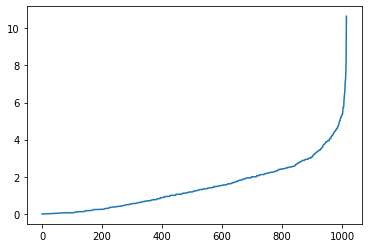

In [15]:
#速度
x_= 0
y_= 0
time_ = 0
v_list = []
for i in range(len(trace_list_list)):
    if(i != 0):
        x_ = round(abs(trace_list_list[i][0]-trace_list_list[i-1][0]), 3)
        y_ = round(abs(trace_list_list[i][1]-trace_list_list[i-1][1]), 3)
        time_ = round(trace_list_list[i][2]-trace_list_list[i-1][2], 3)
        c = round(np.sqrt(x_**2 + y_**2),3)
        v_list.append(c/time_)

v_list_ = sorted(v_list)



x = list(range(len(v_list_)))
y = v_list_
fig = plt.figure()
# グラフの描画
plt.plot(x, y)
plt.show()
fig.savefig('./result/v.png')

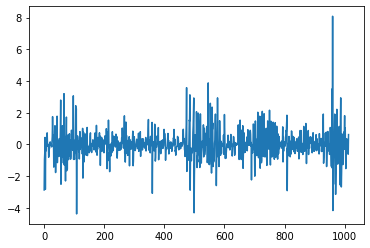

In [16]:
v_no_sa_list = []
for i in range(len(v_list)-1):
    v_no_sa_list.append(v_list[i+1]-v_list[i])
    
    

#v_no_sa_list = sorted(v_no_sa_list)
v_no_sa_list = v_no_sa_list



x = list(range(len(v_no_sa_list)))
y = v_no_sa_list

fig = plt.figure()
# グラフの描画
plt.plot(x, y)
plt.show()
fig.savefig('./result/v_no_sa.png')

In [17]:
for i in range(len(v_no_sa_list)):
    if(v_no_sa_list[i] > 0.25):
        print(i)

3
8
9
10
27
28
29
30
31
35
36
37
42
43
50
51
54
55
59
60
61
65
66
68
72
73
74
76
79
82
84
86
91
97
99
104
105
106
107
111
112
119
126
128
130
131
135
136
137
142
143
153
154
162
168
169
170
174
179
182
183
184
186
191
194
198
202
203
206
207
208
212
213
214
215
227
231
232
236
239
241
242
258
260
261
262
265
266
267
272
274
283
285
294
295
299
300
308
314
320
323
326
330
338
343
346
347
349
352
354
357
359
368
369
376
377
380
394
399
401
402
411
412
414
430
431
432
435
444
445
446
462
463
465
466
472
473
474
482
483
484
485
495
496
497
498
502
507
508
513
514
515
520
521
530
533
538
539
540
541
546
549
553
554
559
560
561
568
569
570
571
577
578
584
585
597
599
600
601
612
621
622
630
631
646
651
652
658
659
661
665
675
677
678
684
685
686
687
696
697
703
705
711
716
721
722
726
731
732
737
738
739
744
750
755
756
762
763
769
774
775
779
782
794
796
804
805
806
807
808
815
823
824
828
832
841
845
847
852
854
855
864
866
871
879
884
887
888
889
890
894
895
905
908
916
922
928
929
936
93

In [18]:
# 単語ごとの速度を出す

# trace_list_listここまでのリスト
sokudo_list = []
for i in range(len(caption_list_list)):
    for j in range(len(trace_list_list)):
        if(caption_list_list[i][2] < trace_list_list[j][2]):
            sokudo_list.append(j-1)
            break
print(sokudo_list)

[30, 47, 58, 70, 81, 95, 227, 258, 258, 287, 306, 342, 352, 364, 375, 432, 495, 527, 530, 547, 568, 577, 581, 597, 608, 608, 661, 671, 675, 701, 719, 731, 743, 750, 768, 771, 779, 779, 802, 808, 823, 833, 843, 852, 862, 878, 922, 922, 960]


In [19]:
for i in range(len(sokudo_list)):
    print("【",caption_list_list[i][0],"】")
    print("time","\t",caption_list_list[i][1],"~",caption_list_list[i][2])
    if(i == 0):
        print("x","\t",trace_list_list[0][0],"~",trace_list_list[sokudo_list[i]][0])
    else:
        print("x","\t",trace_list_list[sokudo_list[i-1]+1][0],"~",trace_list_list[sokudo_list[i]][0])
    if(i == 0):
        print("y","\t",trace_list_list[0][1],"~",trace_list_list[sokudo_list[i]][1])
    else:
        print("y","\t",trace_list_list[sokudo_list[i-1]+1][1],"~",trace_list_list[sokudo_list[i]][1])
    print("          ")

【 I 】
time 	 0.0 ~ 0.6000000000000001
x 	 0.1961 ~ 0.1721
y 	 0.0475 ~ 0.5503
          
【 can 】
time 	 0.6000000000000001 ~ 0.9
x 	 0.1743 ~ 0.2541
y 	 0.4934 ~ 0.6654
          
【 see 】
time 	 0.9 ~ 1.1
x 	 0.21580000000000002 ~ 0.488
y 	 0.6261 ~ 0.6538
          
【 in 】
time 	 1.1 ~ 1.3
x 	 0.488 ~ 0.2497
y 	 0.7062 ~ 0.4585
          
【 this 】
time 	 1.3 ~ 1.5
x 	 0.3317 ~ 0.5175000000000001
y 	 0.42350000000000004 ~ 0.7383000000000001
          
【 image 】
time 	 1.5 ~ 2.0
x 	 0.46940000000000004 ~ 0.5393
y 	 0.731 ~ 0.4832
          
【 a bag 】
time 	 2.0 ~ 5.0
x 	 0.5481 ~ 0.2093
y 	 0.47590000000000005 ~ 0.4949
          
【 of 】
time 	 5.0 ~ 5.8
x 	 0.21250000000000002 ~ 0.2617
y 	 0.4978 ~ 0.6392
          
【 a 】
time 	 5.8 ~ 5.9
x 	 0.2584 ~ 0.2617
y 	 0.6392 ~ 0.6392
          
【 brown 】
time 	 5.9 ~ 6.4
x 	 0.2584 ~ 0.24860000000000002
y 	 0.6392 ~ 0.45120000000000005
          
【 color. 】
time 	 6.4 ~ 6.8
x 	 0.2836 ~ 0.2016
y 	 0.4541 ~ 0.5357000000000001
          
【 I 】


In [20]:
plus_zero = 12-len(str(data_1[0][1]))
file_name = str(data_1[0][1])
for i in range(plus_zero):
    file_name = "0" + file_name

In [43]:
flag = 1
end = 0
#時間外のところを除く
for i in range(len(trace_list_list)):
    if(trace_list_list[i][2] > caption_list_list[len(caption_list_list)-1][2]):
        print(i)
        end = i
        trace_list_list = trace_list_list[:end]
        break




import cv2
img=cv2.imread("/Users/sayako/ocha/study/localized-narratives-master/val2017/"+file_name+".jpg")
#img=cv2.imread("/Users/sayako/Downloads/region_bbox_3.png")
h, w, c = img.shape
size_x = w
size_y = h

for i in range(len(trace_list_list)-1):
    # flag = 単語ごとに分けている
    if(trace_list_list[i][2] >= caption_list_list[flag][2]):
        flag += 1
        
    x = int(trace_list_list[i][0]*size_x)
    y = int(trace_list_list[i][1]*size_y)
    x_2 = int(trace_list_list[i+1][0]*size_x)
    y_2 = int(trace_list_list[i+1][1]*size_y)
    
    
    #cv2.line(img, (x,y), (x_2,y_2), (255 , 255, 255), thickness=2, lineType=cv2.LINE_AA)
    
    
    #速度で色分け
    if(v_list[i]>4):
        cv2.line(img, (x,y), (x_2,y_2), (0,0,255), thickness=2, lineType=cv2.LINE_AA)
    else:
        cv2.line(img, (x,y), (x_2,y_2), (0,255-v_list[i]*36,0), thickness=2, lineType=cv2.LINE_AA)
    pts = np.array(((335, 80), (375, 80), (375, 130)))
    
    
    """
    # 単語ごとに
    if(flag%3 == 0):
        cv2.line(img, (x,y), (x_2,y_2), (0,0,255), thickness=2, lineType=cv2.LINE_AA)
    elif(flag%3 == 1):
        cv2.line(img, (x,y), (x_2,y_2), (0,255,0), thickness=2, lineType=cv2.LINE_AA)
    else:
        cv2.line(img, (x,y), (x_2,y_2), (255,0,0), thickness=2, lineType=cv2.LINE_AA)
    
    """
    """
    #名詞だけ
    if(flag in noun_list):
        if(flag%3==0):
            cv2.line(img, (x,y), (x_2,y_2), (0,0,255), thickness=2, lineType=cv2.LINE_AA)
        elif(flag%3 == 1):
            cv2.line(img, (x,y), (x_2,y_2), (255,0,0), thickness=2, lineType=cv2.LINE_AA)
        else:
            cv2.line(img, (x,y), (x_2,y_2), (0,255,0), thickness=2, lineType=cv2.LINE_AA)
    """        
            
   
    
cv2.imwrite('./result/34139/aaaaa_v_'+name_id+"_ano"+str(data_1[0][2])+'.png', img)

True

In [23]:
flag = 1
end = 0
#時間外のところを除く
for i in range(len(trace_list_list)):
    if(trace_list_list[i][2] > caption_list_list[len(caption_list_list)-1][2]):
        print(i)
        end = i
        trace_list_list = trace_list_list[:end]
        break




import cv2
img=cv2.imread("/Users/sayako/ocha/study/localized-narratives-master/val2017/"+file_name+".jpg")
#img=cv2.imread("/Users/sayako/Downloads/region_bbox_3.png")
h, w, c = img.shape
size_x = w
size_y = h

for i in range(len(trace_list_list)-1):
    # flag = 単語ごとに分けている
    if(trace_list_list[i][2] >= caption_list_list[flag][2]):
        flag += 1
        
    x = int(trace_list_list[i][0]*size_x)
    y = int(trace_list_list[i][1]*size_y)
    x_2 = int(trace_list_list[i+1][0]*size_x)
    y_2 = int(trace_list_list[i+1][1]*size_y)
    
    
    cv2.line(img, (x,y), (x_2,y_2), (0 , 255, 0), thickness=2, lineType=cv2.LINE_AA)
    
    
    pts = np.array(((335, 80), (375, 80), (375, 130)))
    
    
   
    
cv2.imwrite('./result/hello_'+name_id+"_ano"+str(data_1[0][2])+'.png', img)

True

In [58]:
#時間外のところを除く
for i in range(len(trace_list_list)):
    if(trace_list_list[i][2] > caption_list_list[len(caption_list_list)-1][2]):
        print(i)
        end = i
        trace_list_list = trace_list_list[:end]
        break




import cv2
img =cv2.imread("/Users/sayako/ocha/study/localized-narratives-master/val2017/"+file_name+".jpg")
#img =cv2.imread("/Users/sayako/ocha/study/localized-narratives-master/result/COCO_val2017_00000034139/v_34139__1530_ano28.png")
h, w, c = img.shape

size_x = w
size_y = h

x_max = 0
y_max = 0
x_min = w
y_min = h

num_min = 0
num_max = 12

second = 0
before = 0
flag = 0
for i in range(len(trace_list_list)-1):
    
    x = int(trace_list_list[i][0]*size_x)
    y = int(trace_list_list[i][1]*size_y)
    x_2 = int(trace_list_list[i+1][0]*size_x)
    y_2 = int(trace_list_list[i+1][1]*size_y)
    
    
    if((v_list[i]>4)and( trace_list_list[i][2] < num_max)):
        cv2.line(img, (x,y), (x_2,y_2), (0,0,255), thickness=2, lineType=cv2.LINE_AA)
        
    if(v_list[i]>4):
       pass
        
    elif( trace_list_list[i][2] < num_max):
    
        
    
    
        if(x_max < trace_list_list[i][0]):
            x_max = trace_list_list[i][0]
        if(y_max < trace_list_list[i][1]):
            y_max = trace_list_list[i][1]
        if(x_min > trace_list_list[i][0]):
            x_min = trace_list_list[i][0]
        if(y_min > trace_list_list[i][1]):
            y_min = trace_list_list[i][1]
        
        if(flag == 0):
            flag = 1
        else:
            #print(trace_list_list[i][2] , before)
            second = second + trace_list_list[i][2] - before
        before = trace_list_list[i][2] 
        cv2.line(img, (x,y), (x_2,y_2), (0,255-v_list[i]*36,0), thickness=2, lineType=cv2.LINE_AA)
    #pts = np.array(((335, 80), (375, 80), (375, 130)))
    
print(second)
print("min")
print("x: ",x_min*w,"y: ", y_min*h)
print("max")
print("x: ",x_max*w,"y: ", y_max*h)

cv2.rectangle(img, (int(x_min*w), int(y_min*h)), (int(x_max*w), int(y_max*h)), (255, 0, 0), thickness=8)
cv2.imwrite('./result/aaa/bbbb_'+name_id+"_"+str(num_min)+ "~"+str(num_max)+'.png', img)

10.859999999999989
min
x:  82.17600000000002 y:  135.40800000000002
max
x:  445.18399999999997 y:  376.752


True

In [331]:
cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), thickness=8)
cv2.imwrite('./result/'+name_id+"two"+'.png', img)

TypeError: argument for rectangle() given by name ('thickness') and position (4)

In [283]:
flag = 1
end = 0
#時間外のところを除く
for i in range(len(trace_list_list)):
    if(trace_list_list[i][2] > caption_list_list[len(caption_list_list)-1][2]):
        print(i)
        end = i
        trace_list_list = trace_list_list[:end]
        break





img =cv2.imread("/Users/sayako/ocha/study/localized-narratives-master/val2017/"+file_name+".jpg")

h, w, c = img.shape
size_x = w
size_y = h

rec_list_list = []
rec_list = []
x_max = 0
y_max = 0
x_min = size_x
y_min = size_y
for i in range(len(trace_list_list)-1):
    # flag = 単語ごとに分けている
    if(trace_list_list[i][2] >= caption_list_list[flag][2]):
        flag += 1
        
    x = int(trace_list_list[i][0]*size_x)
    y = int(trace_list_list[i][1]*size_y)
    
    
    
    #名詞だけbox
    if(flag in noun_list):
        if(x_max < x):
            x_max = x
        if(y_max < y):
            y_max = y
        if(x_min > x):
            x_min = x
        if(y_min > y):
            y_min = y
        
rec_list = [x_min, y_min, x_max, y_max]
rec_list_list.append(rec_list)

for i in range(len(rec_list_list)):
    cv2.rectangle(img, (rec_list_list[i][0], rec_list_list[i][1]), (rec_list_list[i][2], rec_list_list[i][3]), (255, 0, 0), thickness=8)
    
cv2.imwrite('./result/'+name_id+"_box"+'.png', img)

True

In [87]:
line = "object is not iterable."
words = line.split (' ')
len(words)

4

8573

In [119]:
words_sum = 0
time_sum = 0
t_w = 0

for i in range(len(df)):
    #print(i)
    if(i != 4413):
        dfdf = df[i:i+1].values.tolist()
        sentence = dfdf[0][3]
        words = sentence.split (' ')
        time = dfdf[0][4][len(dfdf[0][4])-1]["end_time"]
        t_w = t_w + len(words)/time
    #print(i,t_w,len(words),time)
    
print(t_w/len(df))

1.9402144941413562
